In [63]:
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [46]:
#Load the data in a dataframe
df = pd.read_excel('data.xls')

In [47]:
#Preliminary information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
Date                   999 non-null datetime64[ns]
Weekly Payment         999 non-null float64
New/Used               961 non-null object
Dealer                 999 non-null object
Make                   999 non-null object
Model                  999 non-null object
Year                   999 non-null int64
Invoiced Amount        999 non-null float64
State                  21 non-null object
City                   446 non-null float64
City ID Name           36 non-null object
Mileage @ Inception    980 non-null float64
ZIP                    184 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 101.5+ KB


In [48]:
df

,Date,Weekly Payment,New/Used,Dealer,Make,Model,Year,Invoiced Amount,State,City,City ID Name,Mileage @ Inception,ZIP
0,2015-08-06 00:00:00,115.21,NaN,JERRYS TOYOTA INC,Ford,Fusion,2013,15688.50,DC,8.0,Washington D.C.,0.0,20904
1,2015-08-14 19:38:00,146.12,NaN,Stevens Creek Toyota,Toyota,Corolla,2015,19849.76,CA,1.0,San Francisco,3.0,95050
2,2015-08-15 11:38:00,147.22,NaN,Toyota South Atlanta,Toyota,Corolla,2015,19991.93,GA,23.0,Atlanta,10.0,30046
3,2015-08-19 08:02:00,182.75,NaN,Grossinger Toyota North,Toyota,Camry,2015,22562.68,IL,7.0,Chicago,25.0,60649
4,2015-08-23 11:48:00,122.96,NaN,Community Honda,Nissan,Altima,2014,16632.59,CA,12.0,Los Angeles,38065.0,90037
5,2015-08-25 15:54:00,140.32,NaN,Pacific Nissan,Nissan,Sentra,2015,19037.95,CA,21.0,San Diego,29.0,91977
6,2015-08-27 21:26:00,141.87,NaN,Community Honda,Honda,Civic,2015,19218.29,CA,12.0,Los Angeles,26.0,90009
7,2015-08-29 13:13:00,141.87,NaN,Community Honda,Honda,Civic,2015,19218.29,CA,12.0,Los Angeles,10.0,90650
8,2015-08-30 11:28:00,147.12,NaN,Stevens Creek Toyota,Toyota,Corolla,2015,19919.76,CA,1.0,San Francisco,4.0,95117
9,2015-08-31 10:06:00,129.35,NaN,JERRYS TOYOTA INC,Toyota,Prius,2014,17567.13,NaN,305.0,Annapolis,37878.0,21701


In [14]:
#Check for null values. Looks like the State, City, Zip have quite a few of null values
df.isnull().sum()

Date                     0
Weekly Payment           0
New/Used                38
Dealer                   0
Make                     0
Model                    0
Year                     0
Invoiced Amount          0
State                  978
City                   553
City ID Name           963
Mileage @ Inception     19
ZIP                    815
dtype: int64

<heading><b> Let's look at a quick distribution of the weekly payment for each year<heading> <b>

In [52]:
print df.groupby(df['Date'].map(lambda x:x.year))['Weekly Payment'].mean()
y_15 = df[df['Date'].map(lambda x:x.year == 2015)]
y_16 = df[df['Date'].map(lambda x:x.year == 2016)]

Date
2015    150.980129
2016    158.828483
Name: Weekly Payment, dtype: float64


Taking a look at the data to see year wise distribution

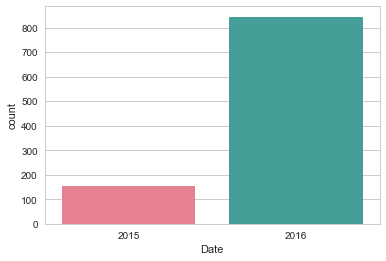

In [120]:
sns.countplot(df['Date'].map(lambda x:x.year), palette='husl')

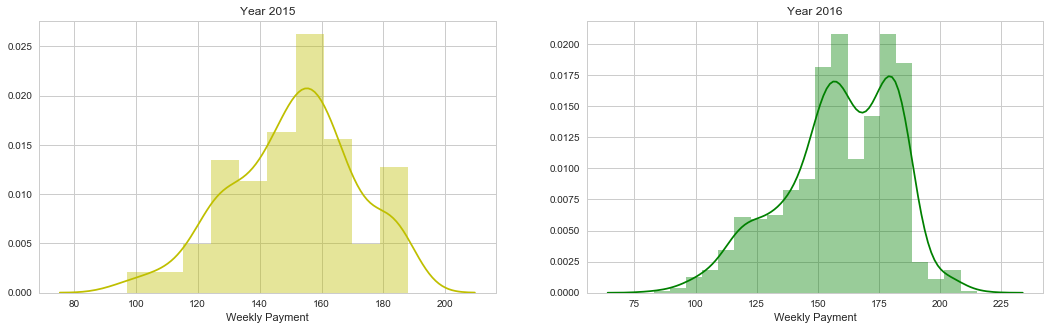

In [66]:
f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(18,5))
p1 = sns.distplot(y_15['Weekly Payment'], ax= ax1, color='y')
p2 = sns.distplot(y_16['Weekly Payment'], ax= ax2, color='g')
p1.set(title="Year 2015")
p2.set(title="Year 2016")

<heading><b> Looks like both the years follow an almost uniform distribution for weekly payments. Except in 2016 we see 2 peaks. </b></heading>

<heading> Analyzing the  average weekly payment cost for New, Reassinged and Used cars, we see that the average cost for a reassigned car is more than that for a used car, This could be because most of the reassigned car could be newer </heading>

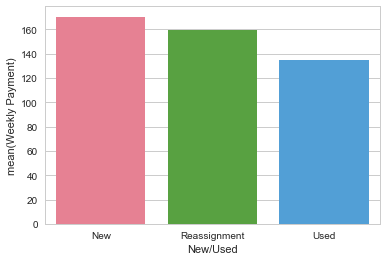

In [68]:
paymentdistbynewused = df.groupby('New/Used')['Weekly Payment'].mean().reset_index()
sns.barplot(x=paymentdistbynewused['New/Used'], y = paymentdistbynewused['Weekly Payment'], data=paymentdistbynewused, palette='husl')

<heading> Here we see that there have been more New cars that have been leased as opposed to Used or Reassgined cars. Also the number Used and Reassigned cars seem to be similar</heading>

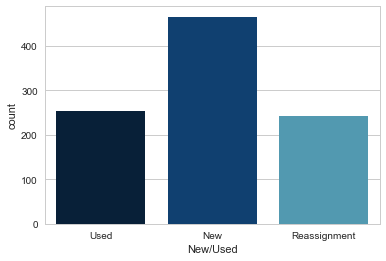

In [126]:
sns.countplot(df['New/Used'], palette='ocean')

<heading>Most cars seems to be from Toyota </heading>

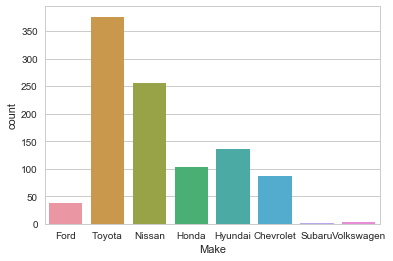

In [127]:
sns.countplot(df['Make'])

It will be interesting to see what the average invoice amount for the various types of cars would be. We see that it is the lowest for Reassigned cars.

In [75]:
df.groupby('New/Used')['Invoiced Amount'].mean()

New/Used
New             19741.871073
Reassignment      202.772273
Used            16027.254822
Name: Invoiced Amount, dtype: float64

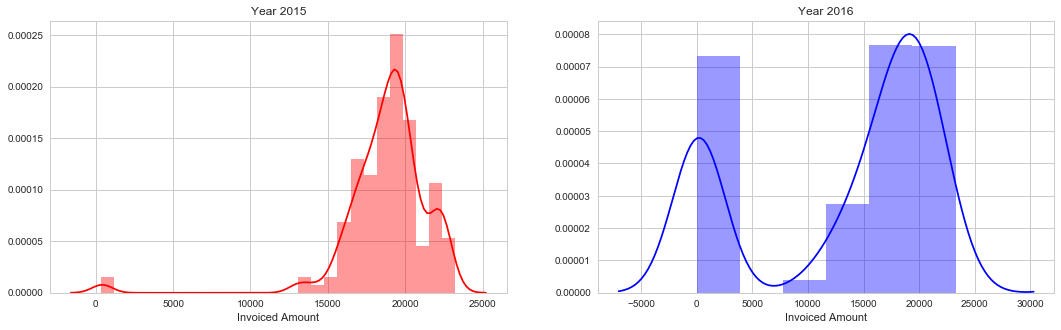

In [80]:
#Let's look at the distribution year wise.
f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(18,5))
p1 = sns.distplot(y_15['Invoiced Amount'], ax= ax1, color='r')
p2 = sns.distplot(y_16['Invoiced Amount'], ax= ax2, color='b')
p1.set(title="Year 2015")
p2.set(title="Year 2016")

We see a peak around 0 because a lot more cars where reassigned in 2016 as opposed to 2015.

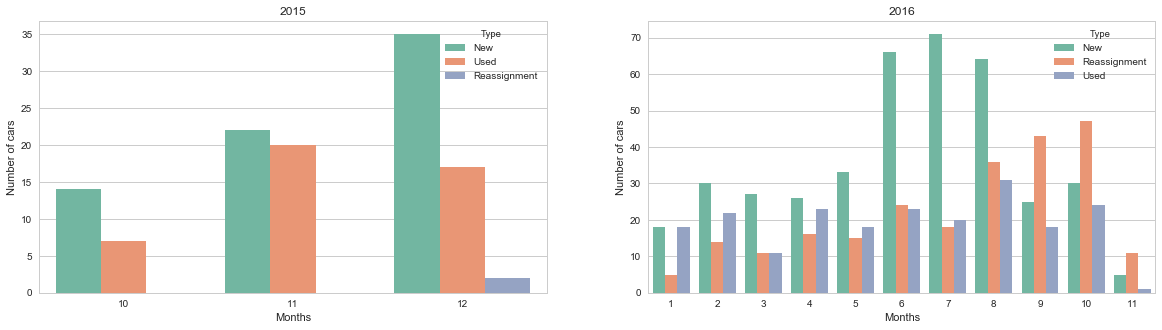

In [123]:
m_15= y_15.groupby([y_15['Date'].map(lambda x:x.month),'New/Used'])['Make'].count().reset_index()
m_16 = y_16.groupby([y_16['Date'].map(lambda x:x.month),'New/Used'])['Make'].count().reset_index()
m_15.columns = ['Month','Type', 'Count']
m_16.columns = ['Month','Type', 'Count']
f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
m_15
p1 = sns.barplot(x='Month', y='Count', data=m_15 ,hue='Type', palette='Set2',ax=ax1)
p1.set(xlabel="Months", ylabel="Number of cars", title="2015")

p2 = sns.barplot(x='Month', y='Count', data=m_16 ,hue='Type', palette='Set2',ax=ax2)
p2.set(xlabel="Months", ylabel="Number of cars", title="2016")

<heading><b> Presented above is a monthwise distribution of number of new/used/reassigned cars for the year 2015 and 2016. We see that the number of reassigned cars is definitely high in 2016. But not as compared to the new cars in both years. </b></heading>